## Problem 2.

From a clinical trial, we have 12 patients with HIV infection. After treatment, the disease progressed in 6 patients (1) and in 6 patients the infection did not progress (0). Four measurements are taken in the 12 patients (Age, sugar levels, T cell levels, and Cholesterol).

Which measurement can be used as a marker to describe the progression of the disease?

Which will be the criteria to predict the progression?

The data can be found in `problem2.csv (x_age, x_sugar, x_Tcell, x_cholesterol, outcome)`. Arrange the data and briefly explain your results. The variable `y` (target) is a vector of 0 and 1 to represent the progression.

### 1. Import modules & data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/problem2.csv', index_col=0, header=None).T

data

,x_age,x_cholesterol,x_sugar,x_Tcell,y
1,35,220,80,550,0
2,18,240,120,600,0
3,22,260,55,580,0
4,23,220,75,575,0
5,28,180,100,620,0
6,38,280,74,674,0
7,40,235,175,275,1
8,25,200,180,180,1
9,35,150,240,140,1
10,34,280,130,80,1


In [11]:
## Obtain the feature
X = data.iloc[:,0:4].values
y = data.iloc[:, 4].values

### 2. Normalizing

Transforming the data to a normal distribution

In [13]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [14]:
pd.DataFrame(X_std)

,0,1,2,3
0,0.894925,-0.093089,-0.876854,0.707141
1,-1.476046,0.353737,-0.103159,0.949451
2,-0.918170,0.800563,-1.360413,0.852527
3,-0.778701,-0.093089,-0.973566,0.828296
4,-0.081357,-0.986741,-0.490007,1.046375
5,1.313332,1.247389,-0.992908,1.308069
6,1.592270,0.242031,0.960671,-0.625563
7,-0.499764,-0.539915,1.057383,-1.085952
8,0.894925,-1.656979,2.217924,-1.279800
9,0.755457,1.247389,0.090264,-1.570572


### 3. Eigenvalues and Eigenvectors

Covariance Matrix

In [15]:
cov_mat = np.cov(X_std.T) 
cov_mat

array([[ 1.09090909,  0.18010937,  0.26674117, -0.22879514],
       [ 0.18010937,  1.09090909, -0.45969833,  0.16890988],
       [ 0.26674117, -0.45969833,  1.09090909, -0.87081863],
       [-0.22879514,  0.16890988, -0.87081863,  1.09090909]])

In [16]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

In [20]:
#  We make a list of pairs (eigenvector, eigenvalue) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# We sort these pairs in descending order with the sort function
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [21]:
# Display the list of eigenvalues in descending order
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.2124153442494996
1.2811226908555111
0.7125102317469294
0.15758809678442287


### 4. Select the Main Components

In [22]:
# From the eigenvalues, we compute the explained variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

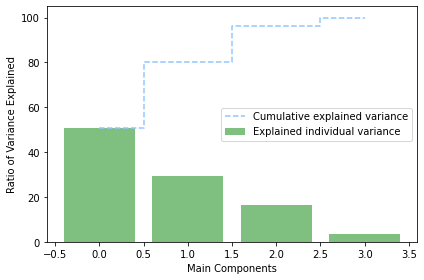

In [24]:
# We plot the variance explained by each eigenvalue and the cumulative variance in a bar chart.
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Explained individual variance', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Cumulative explained variance')
    plt.ylabel('Ratio of Variance Explained')
    plt.xlabel('Main Components')
    plt.legend(loc='best')
    plt.tight_layout()

### 5. Projecting data

In [29]:
# Generating the matrix from the eigenvalue-autovector pairs
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.23306127 -0.73133852]
 [ 0.33145848 -0.6700813 ]
 [-0.67232744  0.0355373 ]
 [ 0.61951073  0.12195132]]


In [30]:
Y = X_std.dot(matrix_w)

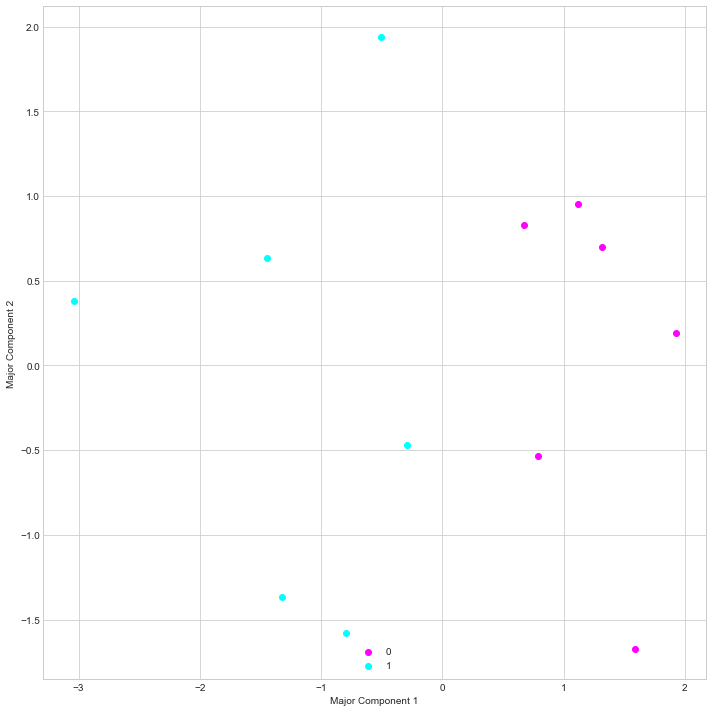

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for lab, col in zip((0, 1),
                        ('magenta', 'cyan')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab, 
                    c=col)
    plt.xlabel('Major Component 1')
    plt.ylabel('Major Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()